## Surface Determination Workflow  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import sys
import pandas as pd
import seaborn as sns

In [2]:
sns.set_style(style = 'darkgrid')
sns.set(font_scale = 1.2)

In [3]:
psize = (16,16,16)
size_lab = '16x16'
pixel_size = 1.51

In [4]:
df = pd.read_csv('/home/atekawade/Dropbox/Arg/transfers/ZEISS_v2/morpho_resolution.csv')
# df

In [5]:
df['radius-um'] = pixel_size*df['radius']

Text(0, 0.5, 'surface error (${\\mu}m$)')

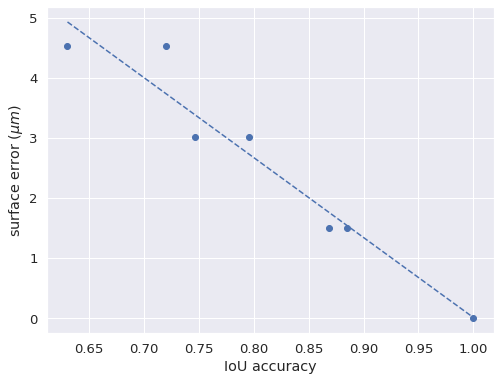

In [6]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
z = np.polyfit(df['iou'], np.abs(df['radius-um']), 1)
p = np.poly1d(z)
ax.scatter(df['iou'], np.abs(df['radius-um']))
iou_vals = np.linspace(min(df['iou']), max(df['iou']),10)
ax.plot(iou_vals, p(iou_vals), '--')
ax.set_xlabel('IoU accuracy')
ax.set_ylabel('surface error (${\mu}m$)')

## IoU vs X  

In [7]:
df = pd.read_csv('/home/atekawade/Dropbox/Arg/transfers/ZEISS_v2/stats.csv')

In [8]:
se = 'surface-error (${\mu}m$)'
df[se] = p(np.asarray(df['IoU']))

In [9]:
df = df[df['SURF-model'] == 3]

Text(0.5, 0, 'X - reduction in scan time')

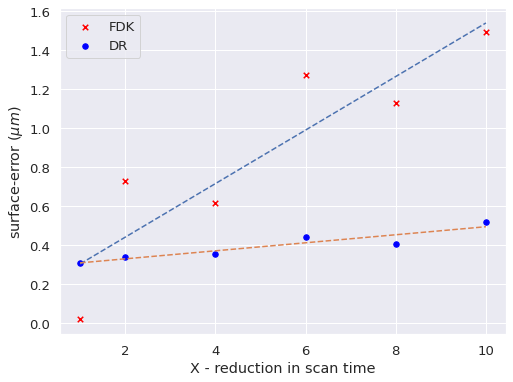

In [10]:
fig, ax = plt.subplots(1,1,figsize = (8,6))
df[df['CT-algo'] == 'FDK'].plot.scatter(x = 'X', y = se, c = 'red', marker = 'x', ax = ax, s= 30, label = 'FDK')
z = np.polyfit(df[df['CT-algo'] == 'FDK']['X'], df[df['CT-algo'] == 'FDK'][se], 1)
p = np.poly1d(z)
x_vals = np.linspace(1,10,10,endpoint=True)
ax.plot(x_vals, p(x_vals), '--')



df[(df['CT-algo'] == 'DR')].plot.scatter(x = 'X', y = se, c = 'blue', marker = 'o', ax = ax, s= 30, label = 'DR')
z = np.polyfit(df[df['CT-algo'] == 'DR']['X'], df[df['CT-algo'] == 'DR'][se], 1)
p = np.poly1d(z)
x_vals = np.linspace(1,10,10,endpoint=True)
ax.plot(x_vals, p(x_vals), '--')
ax.legend()
ax.set_xlabel("X - reduction in scan time")

In [11]:
df

,X,CT-algo,SURF-model,IoU,SNR,ftag,surface-error (${\mu}m$)
1,1,FDK,3,1.000000,9.324358,FDK1X_M_a03,0.016886
11,8,FDK,3,0.916504,5.772823,FDK8X_M_a03,1.127526
13,1,DR,3,0.978130,10.574819,DR1X_M_a03,0.307796
14,8,DR,3,0.970946,10.586311,DR8X_M_a03,0.403351
15,6,DR,3,0.967961,10.597482,DR6X_M_a03,0.443059
40,2,DR,3,0.975929,10.538648,DR2X_M_a03,0.337071
46,4,FDK,3,0.954811,7.184564,FDK4X_M_a03,0.617977
54,4,DR,3,0.974711,10.607557,DR4X_M_a03,0.353278
59,10,FDK,3,0.889119,5.313865,FDK10X_M_a03,1.491797
60,6,FDK,3,0.905659,6.362640,FDK6X_M_a03,1.271785


In [12]:
# df.to_csv('/home/atekawade/Dropbox/Arg/transfers/ZEISS_v2/stats_all.csv')